# Chandelier Exit

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:chandelier_exit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^nsei'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [3]:
import talib as ta

In [4]:
df['ATR'] = ta.ATR(df['High'], df['Low'], df['Adj Close'], timeperiod=22)

In [5]:
df['High_22'] = df['High'].rolling(22).max()
df['Low_22'] = df['Low'].rolling(22).min()

In [6]:
df['CH_Long'] = df['High_22'] - df['ATR'] * 3 
df['CH_Short'] = df['Low_22'] + df['ATR'] * 3

In [7]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,ATR,High_22,Low_22,CH_Long,CH_Short
Date,,,,,,,,,,,
2020-01-31 00:00:00+05:30,12100.400391,12103.549805,11945.849609,11962.099609,11962.099609,771300,123.845526,12430.5,11929.599609,12058.963423,12301.136186
2020-02-03 00:00:00+05:30,11627.450195,11749.849609,11614.500000,11707.900391,11707.900391,669800,134.016166,12430.5,11614.500000,12028.451503,12016.548497
2020-02-04 00:00:00+05:30,11786.250000,11986.150391,11783.400391,11979.650391,11979.650391,560400,140.572249,12430.5,11614.500000,12008.783253,12036.216747
2020-02-05 00:00:00+05:30,12005.849609,12098.150391,11953.349609,12089.150391,12089.150391,758000,140.764455,12430.5,11614.500000,12008.206635,12036.793365
2020-02-06 00:00:00+05:30,12120.000000,12160.599609,12084.650391,12137.950195,12137.950195,565100,137.818308,12430.5,11614.500000,12017.045076,12027.954924


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


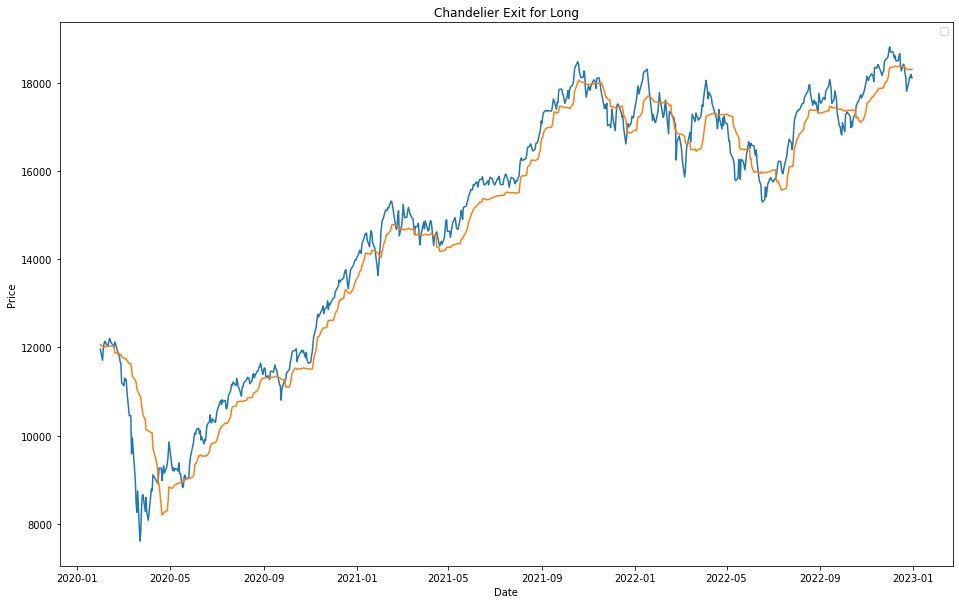

In [8]:
plt.figure(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.plot(df['CH_Long'])
plt.title('Chandelier Exit for Long')
plt.legend(loc='best')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


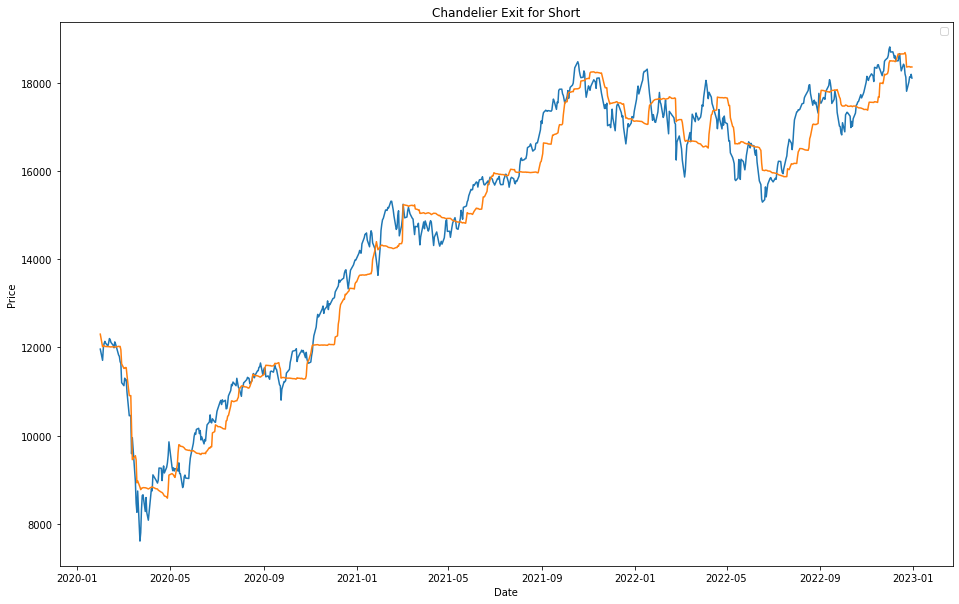

In [9]:
plt.figure(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.plot(df['CH_Short'])
plt.title('Chandelier Exit for Short')
plt.legend(loc='best')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


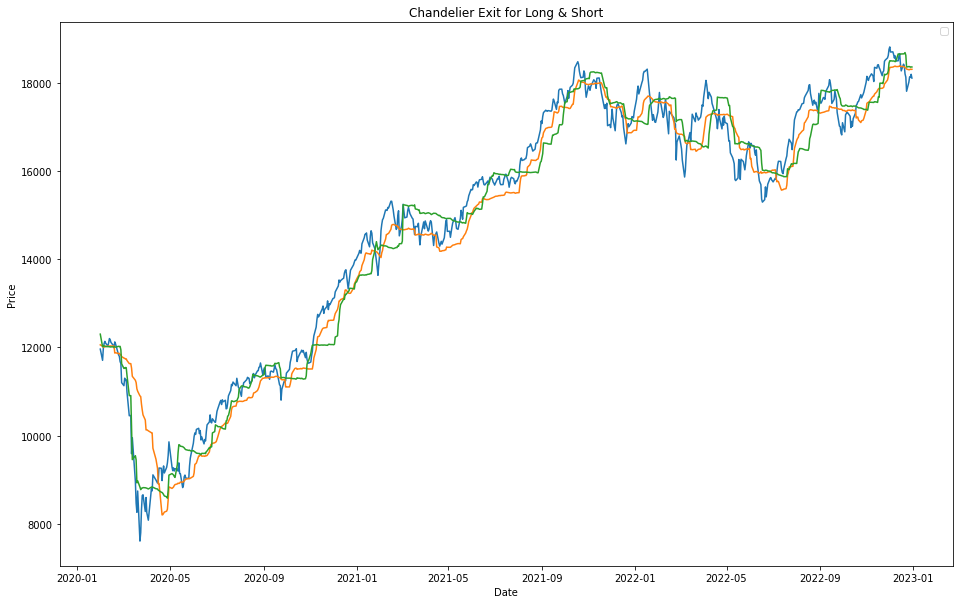

In [10]:
plt.figure(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.plot(df['CH_Long'])
plt.plot(df['CH_Short'])
plt.title('Chandelier Exit for Long & Short')
plt.legend(loc='best')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

## Candlestick with Chandelier Exit

In [11]:
from matplotlib import dates as mdates
import datetime as dt


df['VolumePositive'] = df['Open'] < df['Adj Close']
df = df.dropna()
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].apply(mdates.date2num)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ATR,High_22,Low_22,CH_Long,CH_Short,VolumePositive
0,18291.770833,12100.400391,12103.549805,11945.849609,11962.099609,11962.099609,771300,123.845526,12430.5,11929.599609,12058.963423,12301.136186,False
1,18294.770833,11627.450195,11749.849609,11614.500000,11707.900391,11707.900391,669800,134.016166,12430.5,11614.500000,12028.451503,12016.548497,True
2,18295.770833,11786.250000,11986.150391,11783.400391,11979.650391,11979.650391,560400,140.572249,12430.5,11614.500000,12008.783253,12036.216747,True
3,18296.770833,12005.849609,12098.150391,11953.349609,12089.150391,12089.150391,758000,140.764455,12430.5,11614.500000,12008.206635,12036.793365,True
4,18297.770833,12120.000000,12160.599609,12084.650391,12137.950195,12137.950195,565100,137.818308,12430.5,11614.500000,12017.045076,12027.954924,True


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


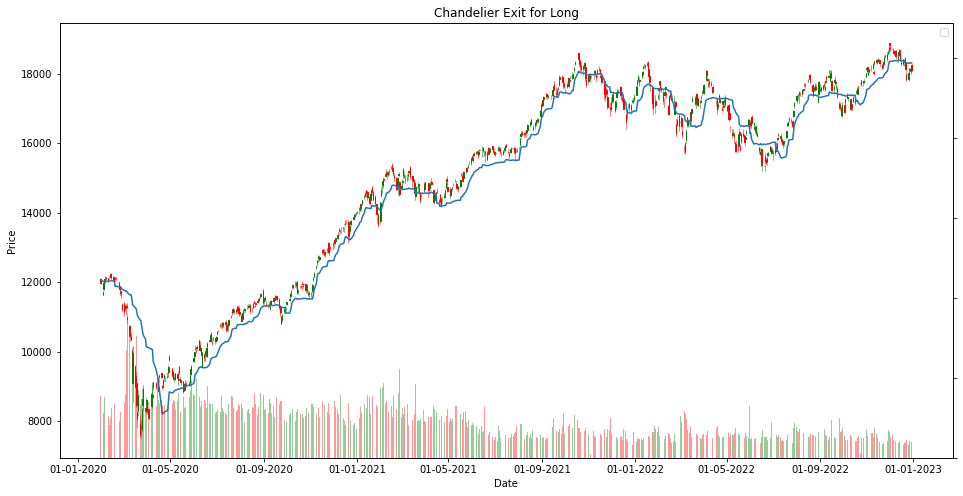

In [15]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1,df.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.Date, df['CH_Long'])
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1v = ax1.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(df.Date, df['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Chandelier Exit for Long')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


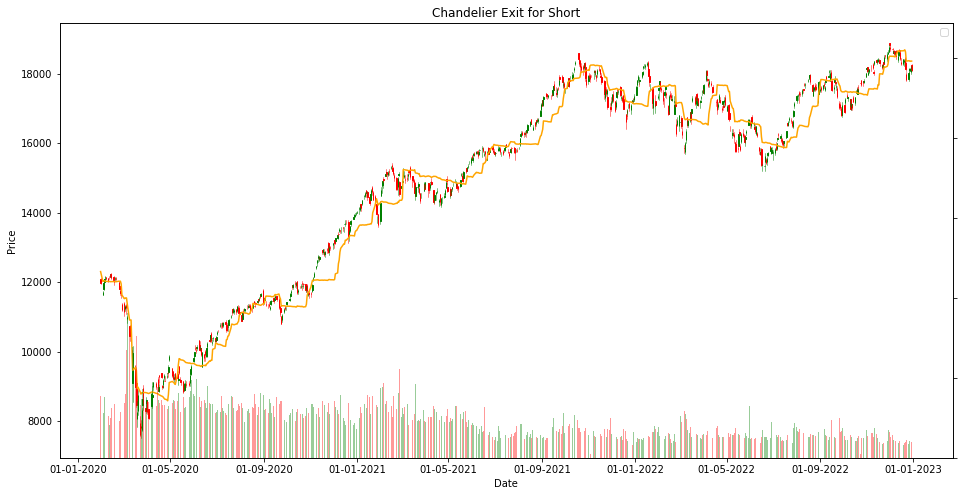

In [16]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1,df.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.Date, df['CH_Short'], color='Orange')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1v = ax1.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(df.Date, df['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Chandelier Exit for Short')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


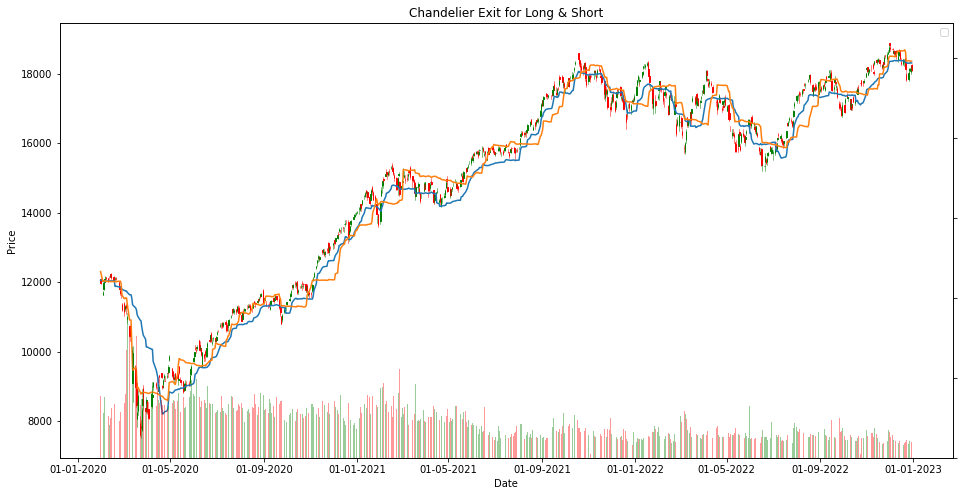

In [17]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1,df.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.Date, df['CH_Long'])
ax1.plot(df.Date, df['CH_Short'])
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1v = ax1.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(df.Date, df['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Chandelier Exit for Long & Short')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')